In [3]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
mba = msrp_band_analyzer.MSRPBand()

In [13]:
mba.update_company_data(['EMT'])
#['EL','EMT']

c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2022-02-07
Latest download summary: 2022-03-02

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
98.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 228836
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 107477
### Adding new columns calculated by average price per unit ### 	
### Sorting time series ### 	
### Removing NAs from product category row ### 	
### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Available combined product category name in costs dataframe ### 	
['topical' 'edible' 'vape cartridge' 'flower' 'pre-roll infused'
 'pre-roll flower' 'other concentrate' 'extract' 'capsule' 'tincture'
 'shake' 'kief' 'pre-roll leaf' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['capsule' 'other concentrate' 'pre-roll flower' 'edible' 'flower'
 'topical' 'vape cartridge' 'pre-roll infused' 'tincture' 'extract'
 'shake' 'kief' 'pre-roll leaf' 'infused butter/oil']


In [44]:
mba.add_new_columns()

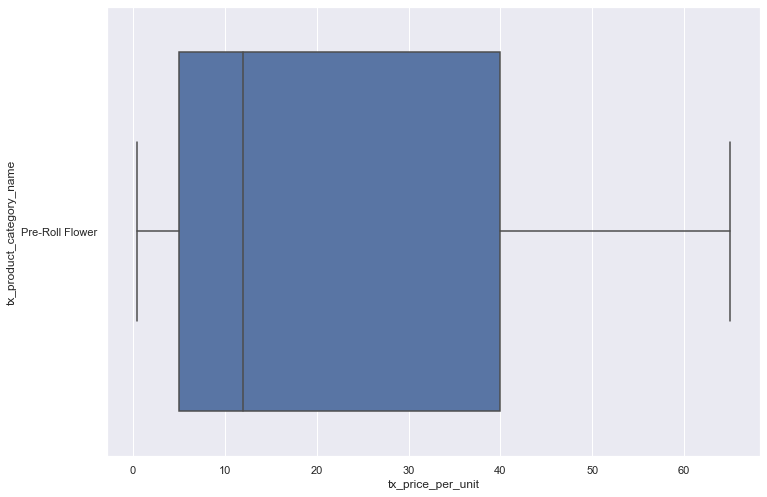

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.004842615012106538 %


In [22]:
mba.boxplot_distribution_outlier_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

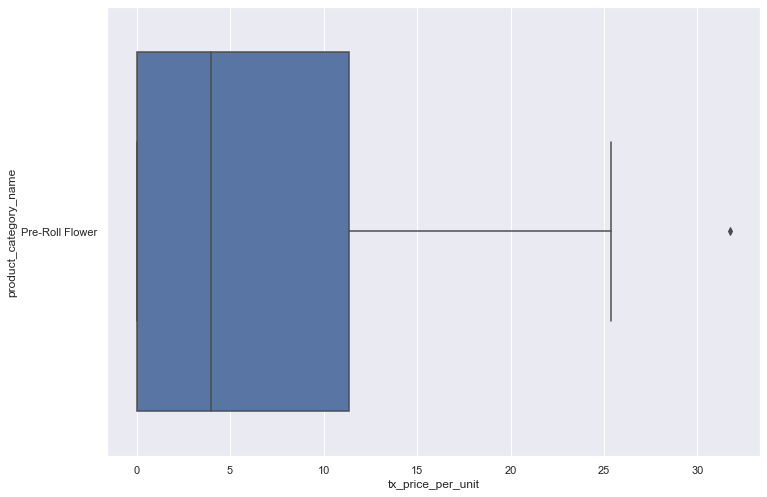

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.021739130434782608 %


In [23]:
mba.boxplot_distribution_outlier_check('product_category_name', 'Pre-Roll Flower', 'C')

Total number of transactions for Pre-Roll Flower in tx_product_category_name : 1652


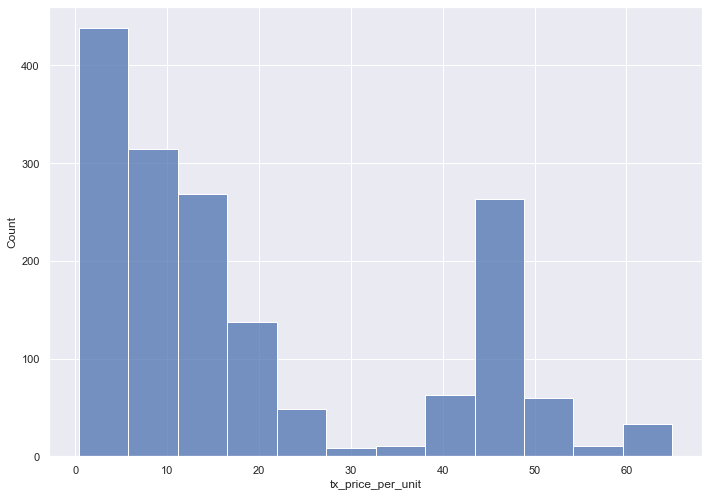

In [24]:
mba.histogram_distribution_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

Total number of transactions for Pre-Roll Flower in product_category_name : 92


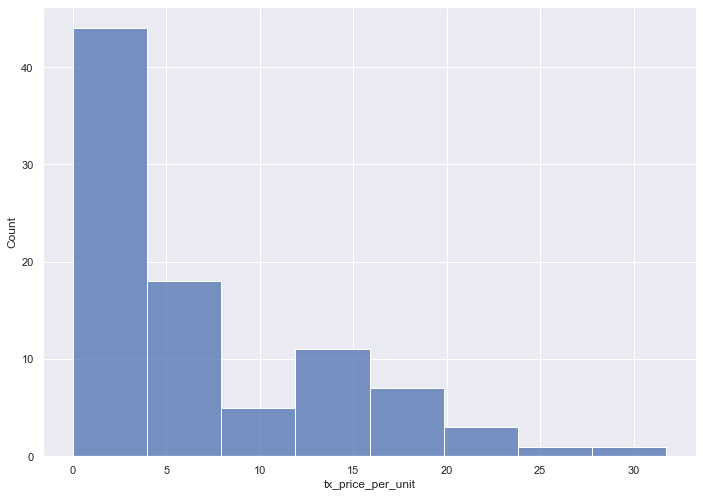

In [25]:
mba.histogram_distribution_check('product_category_name', 'Pre-Roll Flower', 'C')

In [26]:
mba.summary_table_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S')

count    1652.00
mean       19.53
std        17.41
min         0.41
25%         5.00
50%        12.00
75%        40.00
max        65.00
Name: Pre-Roll Flower, dtype: float64


In [27]:
mba.summary_table_by_category('product_category_name', 'Pre-Roll Flower', 'C')

count    90.00
mean      6.42
std       7.29
min       0.00
25%       0.01
50%       4.00
75%      11.38
max      31.75
Name: Pre-Roll Flower, dtype: float64


In [28]:
mba.summary_table_by_category_time('tx_product_category_name', 'Pre-Roll Flower', 'S')

               count   mean    std    min   25%   50%    75%   max
date_in_month                                                     
2020-09          9.0  21.28   7.50   9.00  20.0  22.5  25.00  30.0
2020-10         28.0  13.06   8.20   1.00  10.0  10.0  21.56  30.0
2020-11         30.0  26.92  12.51  10.00  24.0  25.0  37.88  45.0
2020-12         96.0  15.63  12.84   4.25   5.0  10.0  24.00  45.0
2021-01         89.0   8.96   7.94   1.00   5.0   5.0  10.00  58.5
2021-02         66.0  23.89  19.39   1.00  10.0  15.0  35.00  65.0
2021-03         88.0  20.44  15.39   4.50  10.0  15.0  36.00  65.0
2021-04        129.0  23.93  17.39   1.00  10.0  16.0  45.00  65.0
2021-05        172.0  11.99  13.25   0.41   1.0  10.0  18.00  50.0
2021-06        121.0  13.05  15.03   1.00   1.0   5.0  20.00  50.0
2021-07        212.0  16.42  17.88   1.00   1.0  10.0  40.00  50.0
2021-08        111.0  19.75  19.96   1.00   1.0  15.0  45.00  60.0
2021-09         71.0  31.52  19.77   1.00  15.0  45.0  45.00  

In [29]:
mba.summary_table_by_category_time('product_category_name', 'Pre-Roll Flower', 'C')

               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-09          8.0   4.44   4.97   0.00   0.00   2.50   9.00  12.50
2020-10          3.0   0.01   0.00   0.01   0.01   0.01   0.01   0.01
2020-11          1.0  18.00    NaN  18.00  18.00  18.00  18.00  18.00
2020-12          5.0   1.45   0.94   0.01   1.00   2.00   2.00   2.25
2021-01         12.0   7.68  10.41   0.01   0.01   4.30   7.86  31.75
2021-02         12.0   7.33   6.58   1.00   2.00   4.00  12.00  20.00
2021-03          4.0  11.25   7.50   0.01  11.25  15.00  15.00  15.00
2021-04          4.0   6.26   8.50   0.01   0.01   3.50   9.75  18.00
2021-05          2.0   0.02   0.00   0.02   0.02   0.02   0.02   0.02
2021-06          1.0   0.01    NaN   0.01   0.01   0.01   0.01   0.01
2021-07          8.0   4.88   6.47   0.01   0.01   2.50   6.75  15.00
2021-08          9.0  14.33   6.36   1.00  15.00  15.00  18.00  20.00
2021-09          1.0

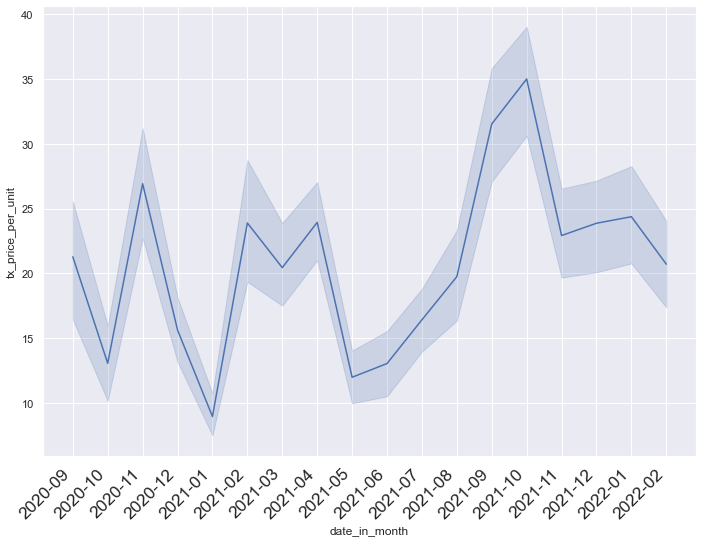

In [30]:
mba.line_plot_time_series_msrp_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S', 95, 'band')

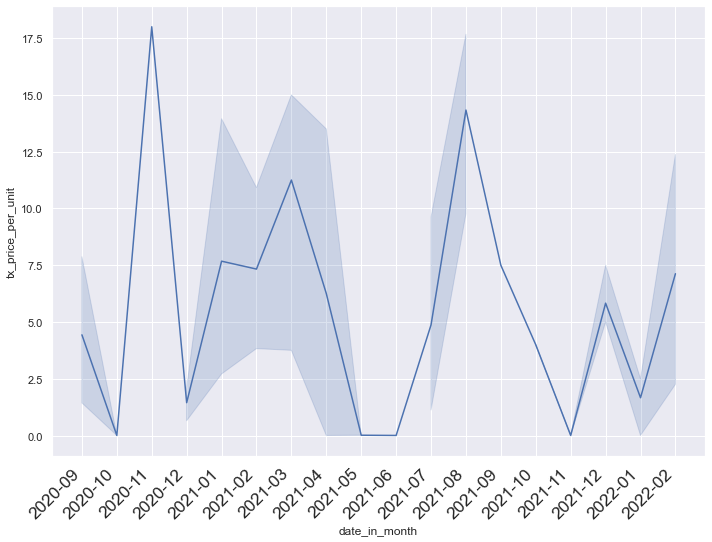

In [31]:
mba.line_plot_time_series_msrp_by_category('product_category_name', 'Pre-Roll Flower', 'C', 95, 'band')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


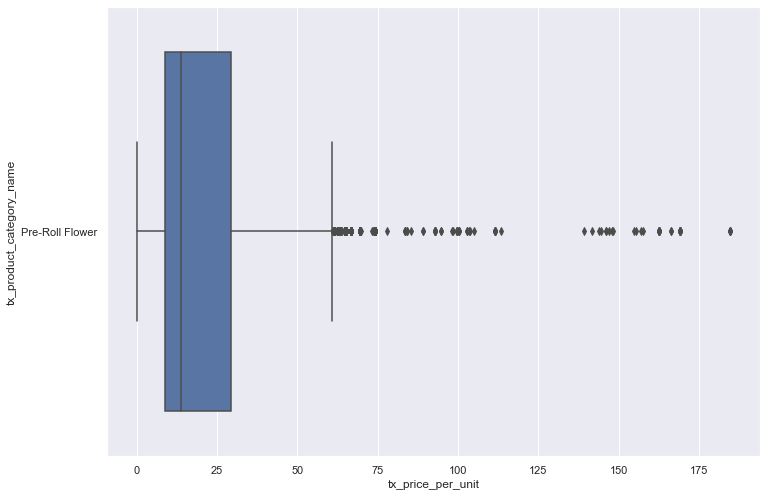

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.15362800970741416 %
### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 31039


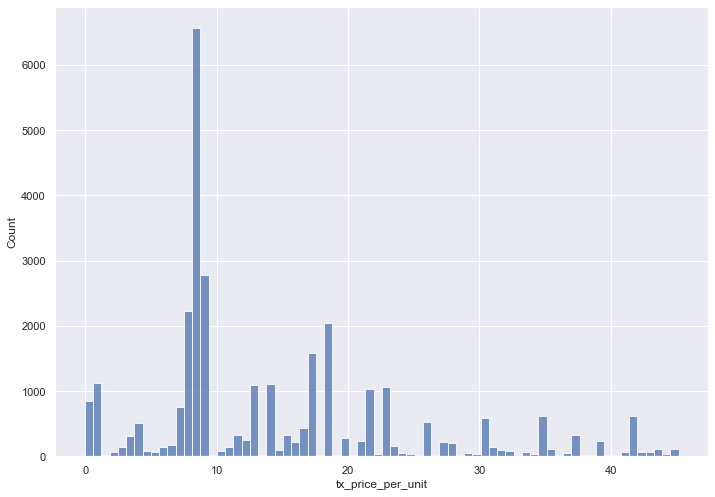

### Outputting summary table ### 	
count    31039.00
mean        14.74
std         10.13
min         -0.01
25%          8.67
50%          9.28
75%         18.56
max         45.16
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean    std   min   25%    50%    75%    max
date_in_month                                                       
2020-06         698.0  14.18   9.78  0.00  7.89   9.28  19.72  44.54
2020-07        2244.0  14.93   9.49  0.00  9.28  13.92  18.56  44.55
2020-08        2303.0  17.90  10.17  0.00  9.28  16.70  18.80  44.55
2020-09        1906.0  16.78  10.62  0.00  9.28  13.92  18.56  44.55
2020-10        1594.0  16.58  10.16  0.01  9.28  13.92  18.56  44.54
2020-11         855.0  16.65   9.95  0.00  9.28  16.70  20.88  44.54
2020-12         764.0  17.15  10.71  0.00  9.28  16.70  18.56  44.57
2021-01        1001.0  14.87   9.99 -0.01  9.28   9.28  18.56  44.54
2021-02        1369.0  13.73

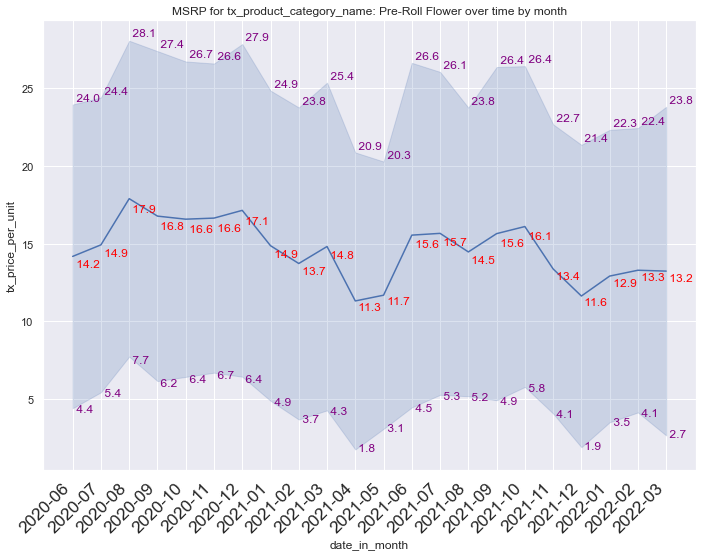

In [14]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Pre-Roll Flower in product_category_name : 1068


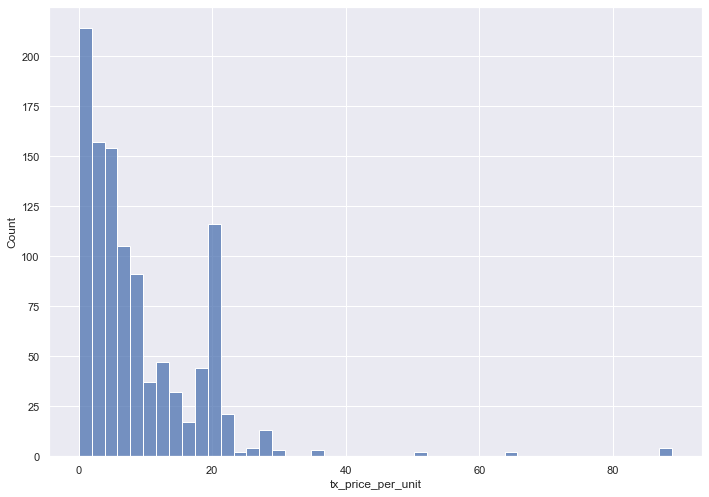

### Outputting summary table ### 	
count    1068.00
mean        8.72
std         9.43
min         0.00
25%         3.00
50%         6.00
75%        13.00
max        88.90
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-06         74.0   8.57   9.11   0.01   1.00   6.00  16.00  34.93
2020-07         96.0   9.50  11.51   0.00   2.42   7.00  15.00  65.00
2020-08        118.0   7.38   7.57   0.01   0.64   4.50  14.86  27.50
2020-09         75.0  13.38  14.68   0.01   5.61   8.00  20.00  88.90
2020-10         22.0  11.33   7.53   0.01   5.62  12.50  20.00  20.00
2020-11         24.0   9.27   9.43   0.01   0.01   4.00  20.00  22.50
2020-12         30.0   6.66   7.30   0.01   0.44   4.00   9.44  22.50
2021-01         48.0   8.23   8.97   0.01   0.01   4.00  20.00  22.50
2021-02         70.0   8.9

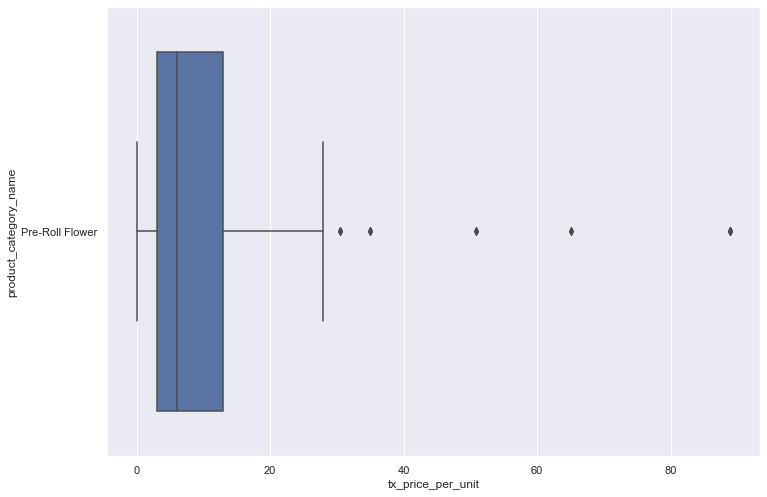

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.05056179775280899 %
### Outputting time series line plot of MSRP ### 	


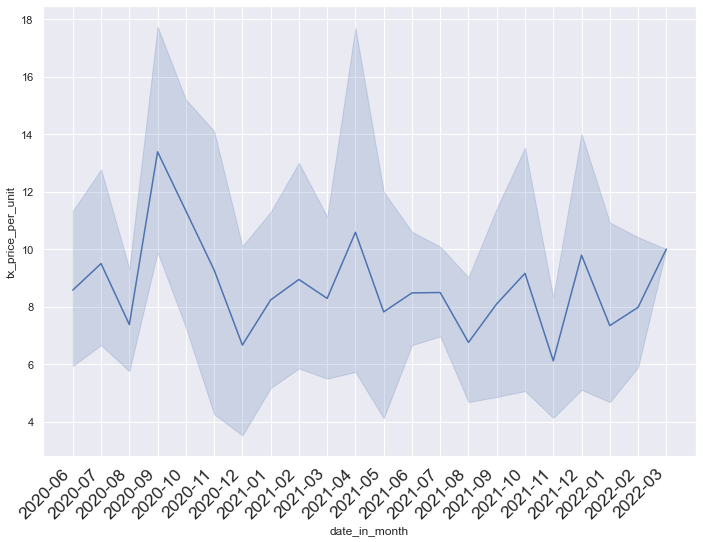

In [39]:
mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')

In [29]:
mba.company_costs_df.product_category_name.value_counts()

Edible (weight - each)                 2206
Vape Cartridge (weight - each)         1142
Pre-Roll Flower                        1068
Flower (packaged eighth - each)        1042
Vape Cartridge (volume - each)          900
Extract (weight - each)                 723
Pre-Roll Infused                        616
Edible (volume - each)                  360
Tincture (volume - each)                332
Other Concentrate (weight - each)       276
Topical (weight - each)                 200
Pre-Roll Leaf                           160
Flower                                  145
Topical (volume - each)                 133
Flower (packaged gram - each)           101
Capsule (weight - each)                  93
Flower (packaged quarter - each)         46
Flower (packaged half ounce - each)      46
Shake (Packaged Gram - each)             32
Flower (packaged ounce - each)           21
Shake (Packaged Half Ounce - each)       19
Flower (packaged - each)                 14
Tincture (weight - each)        

In [83]:
mba.msrp_summary_table_by_time.index

Index(['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03'],
      dtype='object', name='date_in_month')

In [79]:
mba.msrp_summary_table_by_time['lower_confidence_band'] = mba.msrp_summary_table_by_time['mean'] - mba.msrp_summary_table_by_time['std']
mba.msrp_summary_table_by_time['upper_confidence_band'] = mba.msrp_summary_table_by_time['mean'] + mba.msrp_summary_table_by_time['std']

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


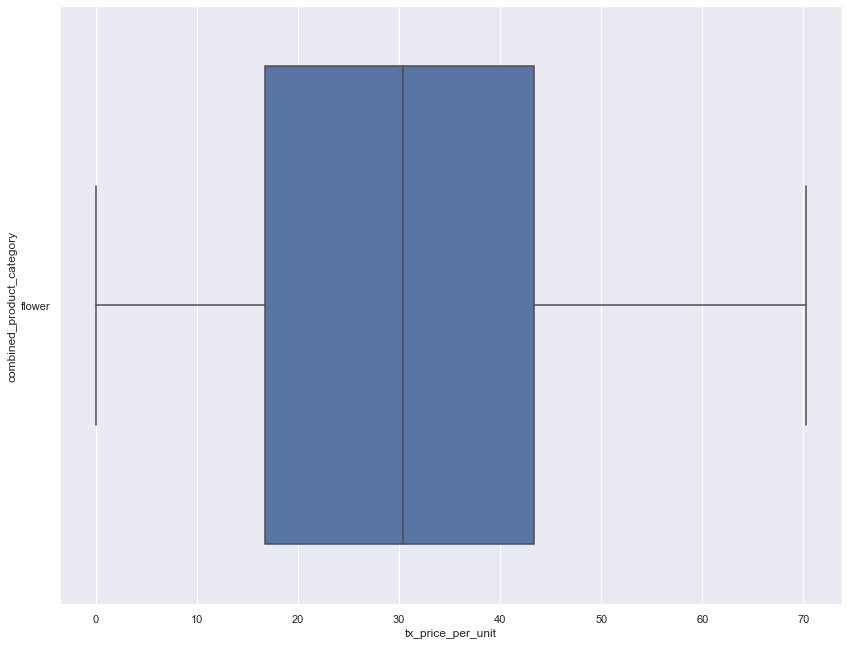

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 34351


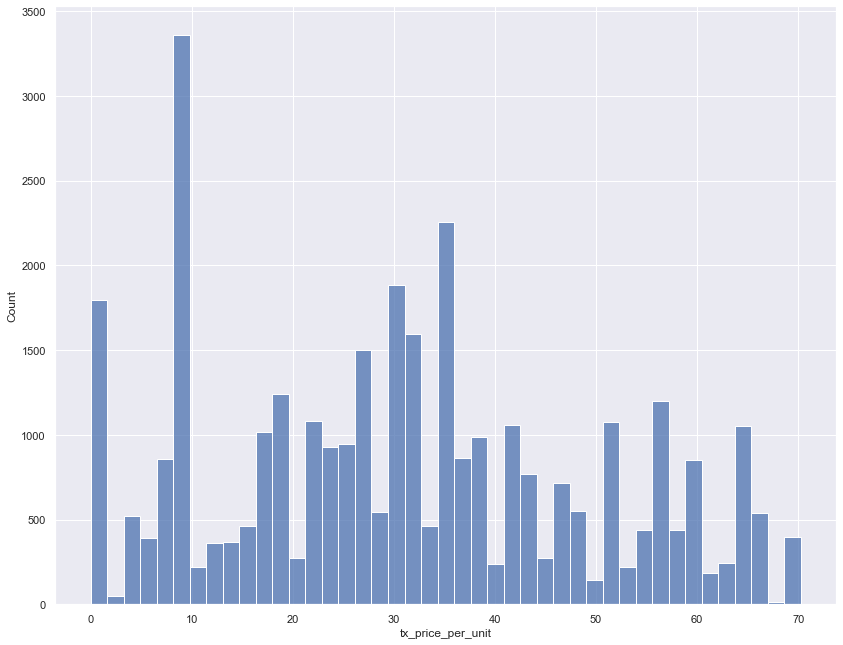

### Outputting summary table ### 	
count    34351.00
mean        31.03
std         18.57
min         -0.01
25%         16.71
50%         30.36
75%         43.37
max         70.27
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean    std   min    25%    50%    75%    max
date_in_month                                                        
2020-06        1139.0  22.02  17.21  0.00   8.35  15.78  35.49  69.61
2020-07        2296.0  28.32  20.77  0.00   9.28  26.25  41.88  69.61
2020-08        2170.0  27.21  20.90  0.00   9.28  18.56  41.76  69.61
2020-09        1742.0  28.12  19.70  0.01   9.28  19.49  41.76  68.92
2020-10        1535.0  24.48  19.56 -0.01   8.35  13.26  41.76  70.20
2020-11        1426.0  25.24  20.31  0.00   8.35  16.70  37.58  69.61
2020-12        1593.0  32.43  19.50  0.00  14.58  29.70  48.26  69.65
2021-01        1537.0  37.90  18.93  0.00  25.98  37.12  54.29  69.61
2021-02        1446.0  37.1

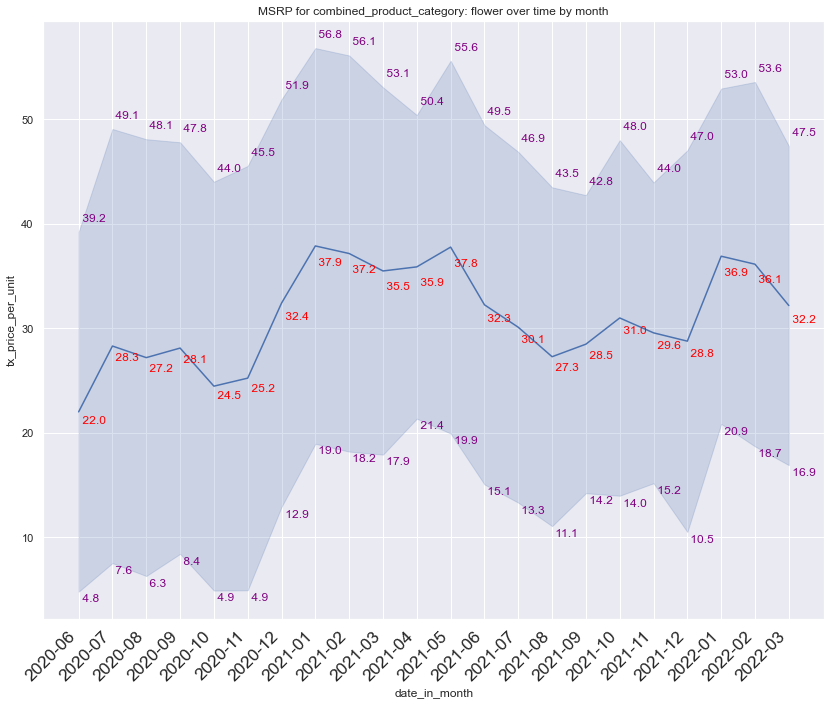

In [87]:
mba.run_analysis('combined_product_category', 'flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


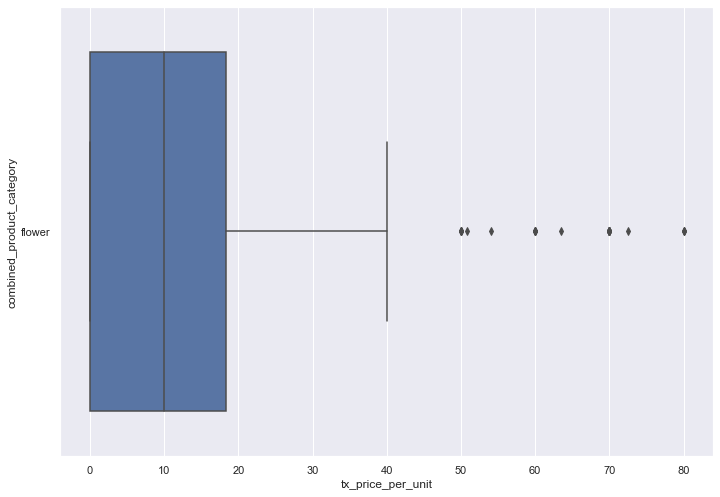

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.023321554770318022 %
### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 1382


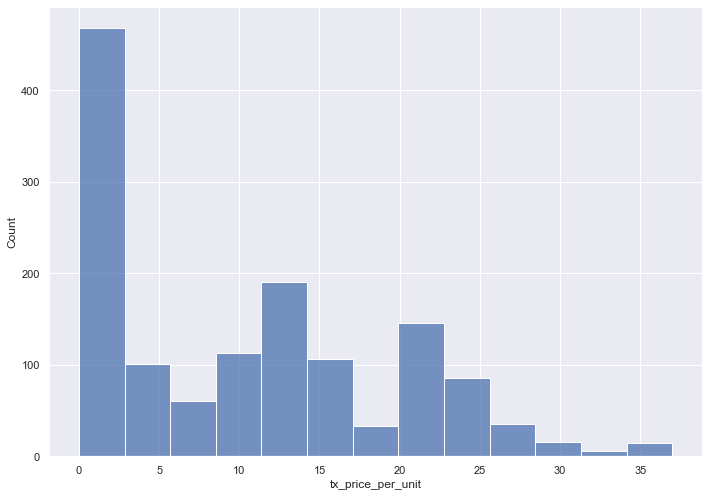

### Outputting summary table ### 	
count    1373.00
mean       10.17
std         9.52
min         0.00
25%         0.01
50%        10.00
75%        16.50
max        37.00
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-06        101.0   7.17   8.67   0.00   0.03   2.00  14.00  27.50
2020-07         86.0   8.53   9.14   0.00   0.10   4.48  15.00  27.50
2020-08         80.0   7.74  10.82   0.01   0.01   3.29  13.94  37.00
2020-09         96.0   9.83  10.68   0.00   2.79   4.47  17.00  37.00
2020-10         95.0  10.97   8.53   0.01   3.57  12.50  16.99  27.50
2020-11         18.0   6.52  10.83   0.01   0.01   0.01  15.02  25.00
2020-12         30.0   6.64   8.53   0.01   0.01   0.01  15.38  25.00
2021-01         68.0  10.38  10.58   0.00   0.01  12.50  20.00  30.00
2021-02         77.0  10.05   9.48 

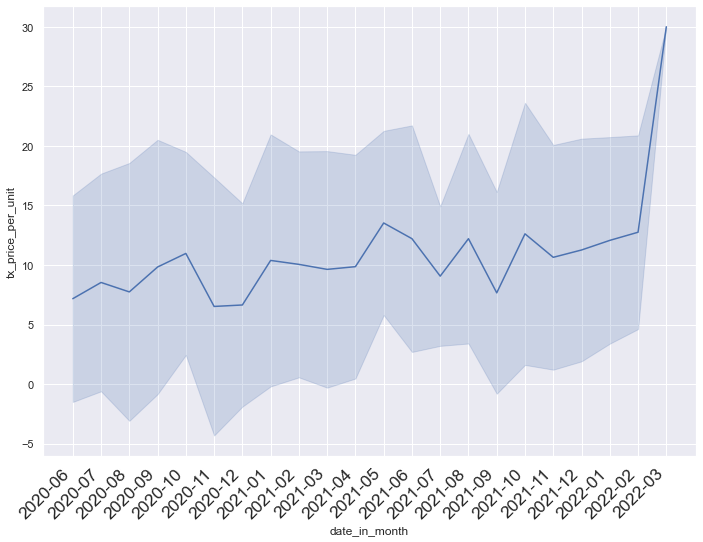

In [61]:
mba.run_analysis('combined_product_category', 'flower', 'C')